In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
#The data file represents the annual net income for all US arlines combined. The information accounts for
# 2000-2020. Summary totals are shown for all airports and all carriers.
revenue = pd.read_csv("../Resources/Yearly_Income.csv")
revenue.tail(10)

,Year,Quarter,DOMESTIC,LATIN AMERICA,ATLANTIC,PACIFIC,INTERNATIONAL,TOTAL
94,2018,TOTAL,13938929,1033398,1118450,-1007124,174844,15258498
95,2019,1,2732085,269912,-146614,-143659,-25952,2685771
96,2019,2,4891390,337052,278518,-275831,17323,5248453
97,2019,3,4344519,477840,323253,-191276,-50583,4903753
98,2019,4,3739229,465079,-76833,-340004,-192926,3594546
99,2019,TOTAL,15707223,1549883,378323,-950769,-252138,16432523
100,2020,1,-3227152,-251044,-924766,-553586,12488,-4944059
101,2020,2,-8050996,-432400,-1134773,-720025,381609,-9956585
102,2020,3,-8832375,-609655,-763418,-386205,191555,-10400098
103,2020,TOTAL,-20110523,-1293098,-2822957,-1659815,585652,-25300741


In [4]:
#For this analysis, I will only be using data for the most recent five years.
five_year_df = revenue.tail(29)
five_year_df = five_year_df.reset_index(drop=True)

#Let's rename the columns
five_year_df = five_year_df.rename(columns={'DOMESTIC':'Domestic',
                   'LATIN AMERICA':'Latin_America',
                   'ATLANTIC':'Atlantic',
                   'PACIFIC':'Pacific',
                   'INTERNATIONAL':'International',
                   'TOTAL':'Total'})
#Display dataframe
five_year_df.head(10)

,Year,Quarter,Domestic,Latin_America,Atlantic,Pacific,International,Total
0,2015,1,3055504,213705,152544,79301,43486,3544541
1,2015,2,4678728,158598,655387,201055,38855,5732622
2,2015,3,6494263,604630,1683382,888611,-15769,9655117
3,2015,4,6983407,25921,407138,-7333,38520,7447652
4,2015,TOTAL,21211902,1002854,2898451,1161633,105091,26379931
5,2016,1,2856167,362407,43896,226726,5922,3495119
6,2016,2,4229096,279168,326080,257402,2399,5094145
7,2016,3,3407438,266508,351436,163709,6472,4195563
8,2016,4,2861738,141921,-91411,-168870,81537,2824916
9,2016,TOTAL,13354439,1050005,630002,478968,96330,15609744


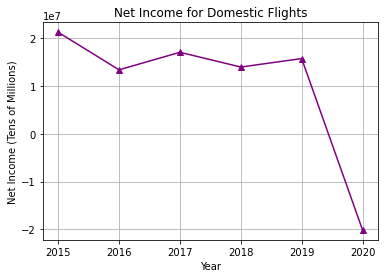

In [5]:
# Let's store the totals for domestic flights from 2015-2020 into variables for plotting

domestic_2015 = five_year_df.iloc[4,2]
domestic_2016 = five_year_df.iloc[9,2]
domestic_2017 = five_year_df.iloc[14,2]
domestic_2018 = five_year_df.iloc[19,2]
domestic_2019 = five_year_df.iloc[24,2]
domestic_2020 = five_year_df.iloc[28,2]

y1 = [domestic_2015, domestic_2016, domestic_2017, domestic_2018,
                domestic_2019, domestic_2020]

x = ['2015','2016','2017','2018','2019','2020']

plt.plot(x, y1, linewidth=1.5, color='purple', marker='^')
plt.xlabel('Year')
plt.ylabel('Net Income (Tens of Millions)')
plt.title('Net Income for Domestic Flights')
plt.grid (b=True,which="major",axis="both")
plt.savefig("../output_data/Net_Income_Domestic.png")

In [6]:
# Annual total revenue for domestic flights in the U.S. took a major plunge in 2020. 
# The prior years show some consistency in the 10-20 million range. 
# Travel restrictions had a major impact on domestic flights.

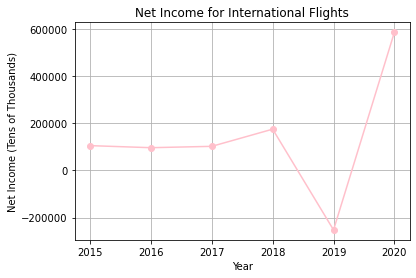

In [7]:
# Let's store the totals for international flights from 2015-2020 into variables for plotting

international_2015 = five_year_df.iloc[4,6]
international_2016 = five_year_df.iloc[9,6]
international_2017 = five_year_df.iloc[14,6]
international_2018 = five_year_df.iloc[19,6]
international_2019 = five_year_df.iloc[24,6]
international_2020 = five_year_df.iloc[28,6]

y2 = [international_2015, international_2016, international_2017, 
      international_2018, international_2019, international_2020]

x = ['2015','2016','2017','2018','2019','2020']

plt.plot(x, y2, linewidth=1.5, color='pink', marker='o')
plt.xlabel('Year')
plt.ylabel('Net Income (Tens of Thousands)')
plt.title('Net Income for International Flights')
plt.grid (b=True,which="major",axis="both")
plt.savefig("../output_data/Net_Income_International.png")

In [8]:
# Annual total revenue for international flights for U.S. carriers found substantial gains in 2020. 
# Although the gains were high relative to prior years, domestic flights typically generate the highest revenue for U.S. carriers. 
# The gains here were not enough to offset losses.
# The increase in international flights reveals the increase in demand to leave the country during the pandemic.

In [10]:
# Let's store column values to run an analysis on average net income change 
# over the past 5 years across all regions.
df = five_year_df.drop([4,9,14,19,24,28])
yearly_df = df.groupby('Year')
yearly_average = yearly_df.mean().round()
yearly_average

,Domestic,Latin_America,Atlantic,Pacific,International,Total
Year,,,,,,
2015,5302976.0,250714.0,724613.0,290408.0,26273.0,6594983.0
2016,3338610.0,262501.0,157500.0,119742.0,24082.0,3902436.0
2017,4255363.0,187618.0,-56949.0,-210432.0,25521.0,4201120.0
2018,3484732.0,258350.0,279612.0,-251781.0,43712.0,3814624.0
2019,3926806.0,387471.0,94581.0,-237692.0,-63034.0,4108131.0
2020,-6703508.0,-431033.0,-940986.0,-553272.0,195217.0,-8433581.0


In [ ]:
# An additional analysis was completed to display the average annual net income for U.S. carriers across all regions. 
# The data frame supports our claim that drastic losses are directly related to the pandemic, since there are consistent profits
# throughout the previous years.